### Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings("ignore")

### Loading Datasets

In [40]:
data = pd.read_excel(r"D:\Project\DATA.xlsx")
data

,DATE,Average_Earning,GDP,Mortgage,Population,Unemployment_Rate,Average_Sales_Price
0,1979-01-01,335,2526.61,10.39,223973,5.90,68300
1,1979-04-01,335,2591.25,10.50,224150,5.90,72400
2,1979-07-01,330,2667.57,11.09,224333,5.80,74200
3,1979-10-01,326,2723.88,11.64,224529,5.80,72700
4,1980-01-01,321,2789.84,12.88,224734,5.60,73600
...,...,...,...,...,...,...,...
170,2021-07-01,367,23550.42,2.87,332192,3.50,473000
171,2021-10-01,362,24349.12,3.07,332513,3.70,497300
172,2022-01-01,362,24740.48,3.44,332684,3.50,514100
173,2022-04-01,358,25248.48,4.98,332863,3.70,527500


About Datasets :

Average Earning : Average earnings of wage and salary workers 

GDP : The market value of the goods and services produced by labor and property located in the United States.

Mortgage :  Fixed Rate Mortgage Average in the United States

Population : Population includes resident population plus armed forces overseas.

Unemployment Rate : The number of unemployed as a percentage of the labor force.

Average Sales Price : Average Sales Price of Houses Sold for the United States.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE                 175 non-null    datetime64[ns]
 1   Average_Earning      175 non-null    int64         
 2   GDP                  175 non-null    float64       
 3   Mortgage             175 non-null    float64       
 4   Population           175 non-null    int64         
 5   Unemployment_Rate    175 non-null    float64       
 6   Average_Sales_Price  175 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 9.7 KB


In [42]:
# Dropping DATE column which is irrevelant
data = data.drop(["DATE"], axis =1)

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Average_Earning,175.00,331.54,16.16,309.00,316.50,332.00,338.50,393.00
GDP,175.00,11177.83,6172.59,2526.61,5809.97,10435.74,15744.97,25698.96
Mortgage,175.00,7.62,3.56,2.73,4.66,6.99,9.92,18.45
Population,175.00,271867.62,41383.22,223973.00,232602.00,240183.00,312716.00,333137.00
Unemployment_Rate,175.00,6.32,2.22,3.50,4.30,6.00,7.50,14.70
Average_Sales_Price,175.00,227624.57,110564.35,68300.00,144600.00,207800.00,304750.00,542900.00


In [44]:
data.isna().sum()

Average_Earning        0
GDP                    0
Mortgage               0
Population             0
Unemployment_Rate      0
Average_Sales_Price    0
dtype: int64

No Null value is present

In [45]:
data.duplicated().sum()

0

No Duplicate value is there

<AxesSubplot: >

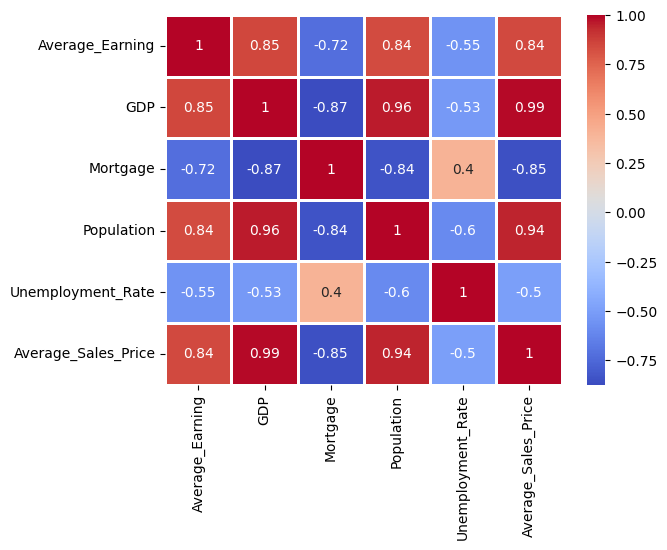

In [46]:
# Checking the correlation between the features using Heatmap
sns.heatmap(data.corr(), annot= True, linewidths= 2, cmap = "coolwarm")

- Average Sales Price have a very strong correlation between Average Earning, GDP, and Population which means When the value of one variable increases, the value of the other variable increases in a similar fashion.

- strongly negative correlation between Mortgage which means When the value of one Mortgage increases, the value of the House price tends to decrease

- And Unemployment rate is weakly correlated which means it will not effect much.



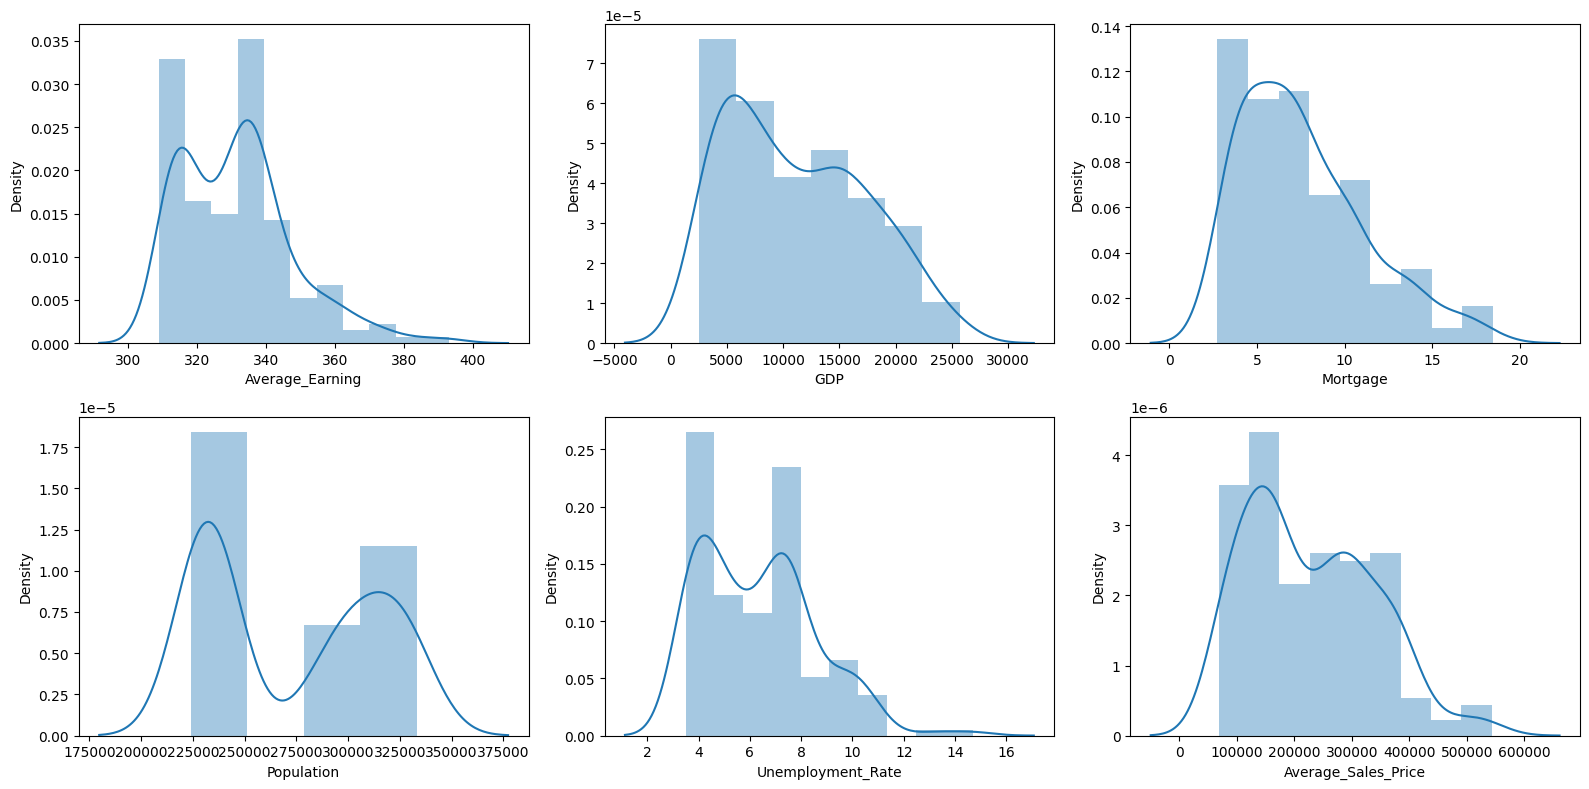

In [47]:
# Creating Distplot for checking the distribution of the data
plt.figure(figsize = (16,8))

for i,j in enumerate(data.columns):

    plt.subplot(2,3,i+1)

    sns.distplot(data[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

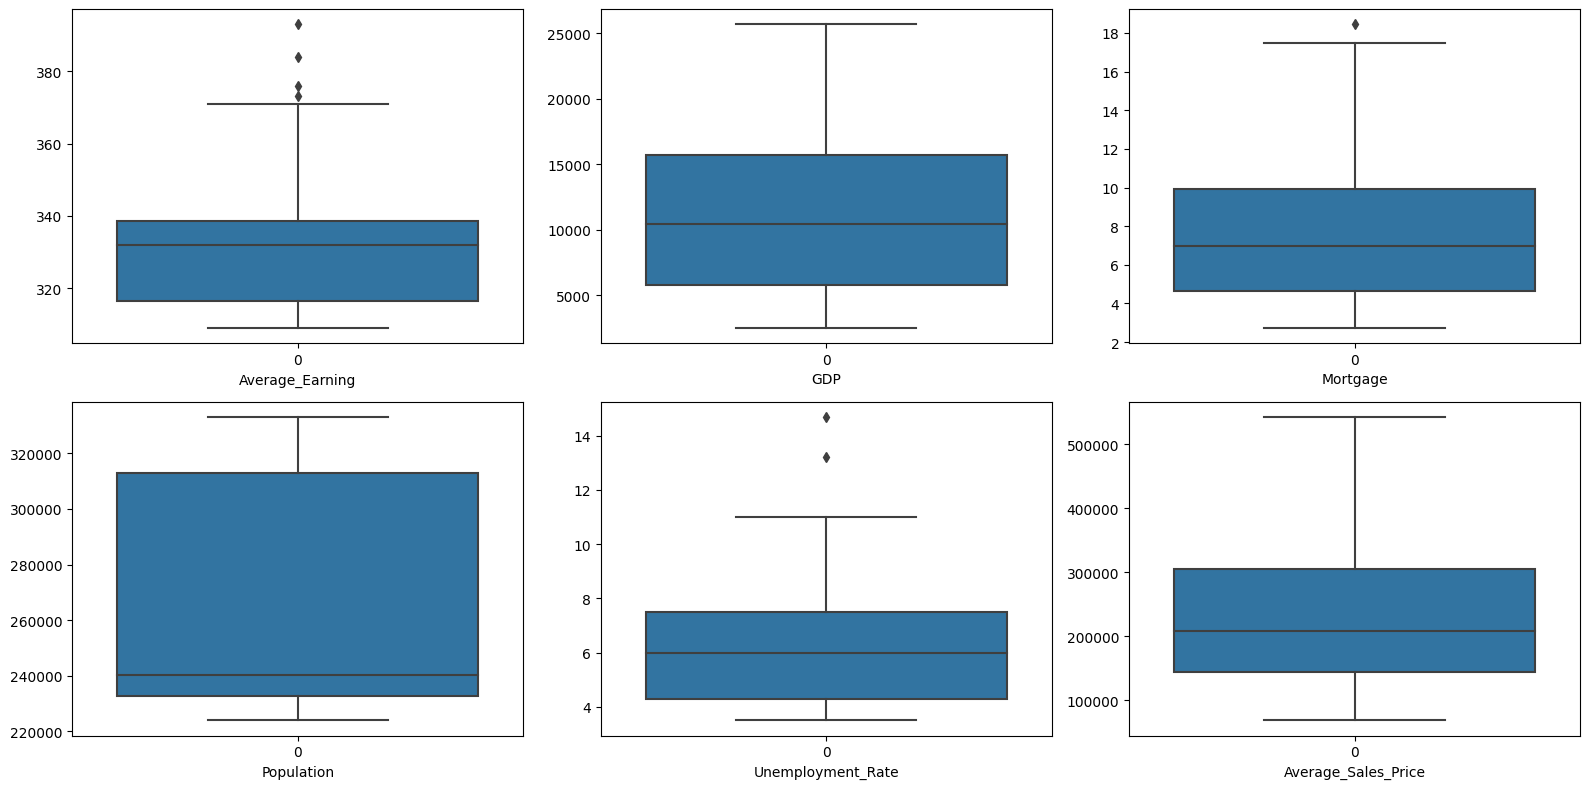

In [48]:
# Creating BoxPlot for checking the outliers in the data
plt.figure(figsize = (16,8))

for i,j in enumerate(data.columns):

    plt.subplot(2,3,i+1)

    sns.boxplot(data[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

Outliers are present. So, We have to perform winsorization for treating Ouliers

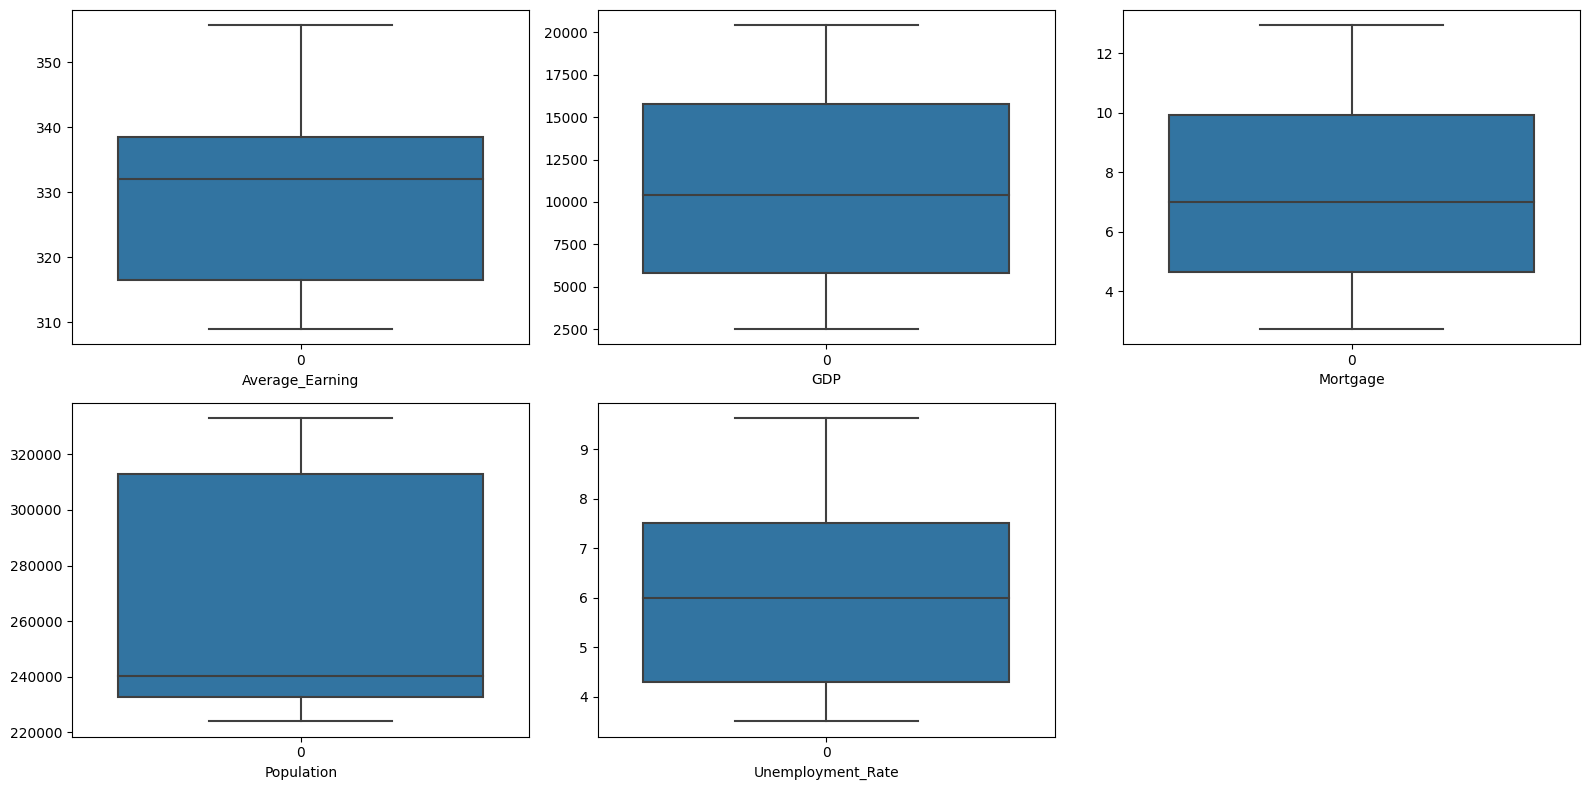

In [49]:
# Performing winsorization using gaussian limits and 1.5*std_dev
from feature_engine.outliers import Winsorizer

def outliers_treatment(i):
    winsor = Winsorizer(capping_method = "gaussian",
                        fold = 1.5,
                        tail = "both",
                        variables = [i])

    data[i] = winsor.fit_transform(data[[i]])
    return data[i]

for i in data.iloc[:,:-1].columns:
    outliers_treatment(i)

#########################################################################################################################


# plotting boxplot after performing winsorization

plt.figure(figsize = (16,8))

for i,j in enumerate(data.iloc[:,:-1].columns):

    plt.subplot(2,3,i+1)

    sns.boxplot(data[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()


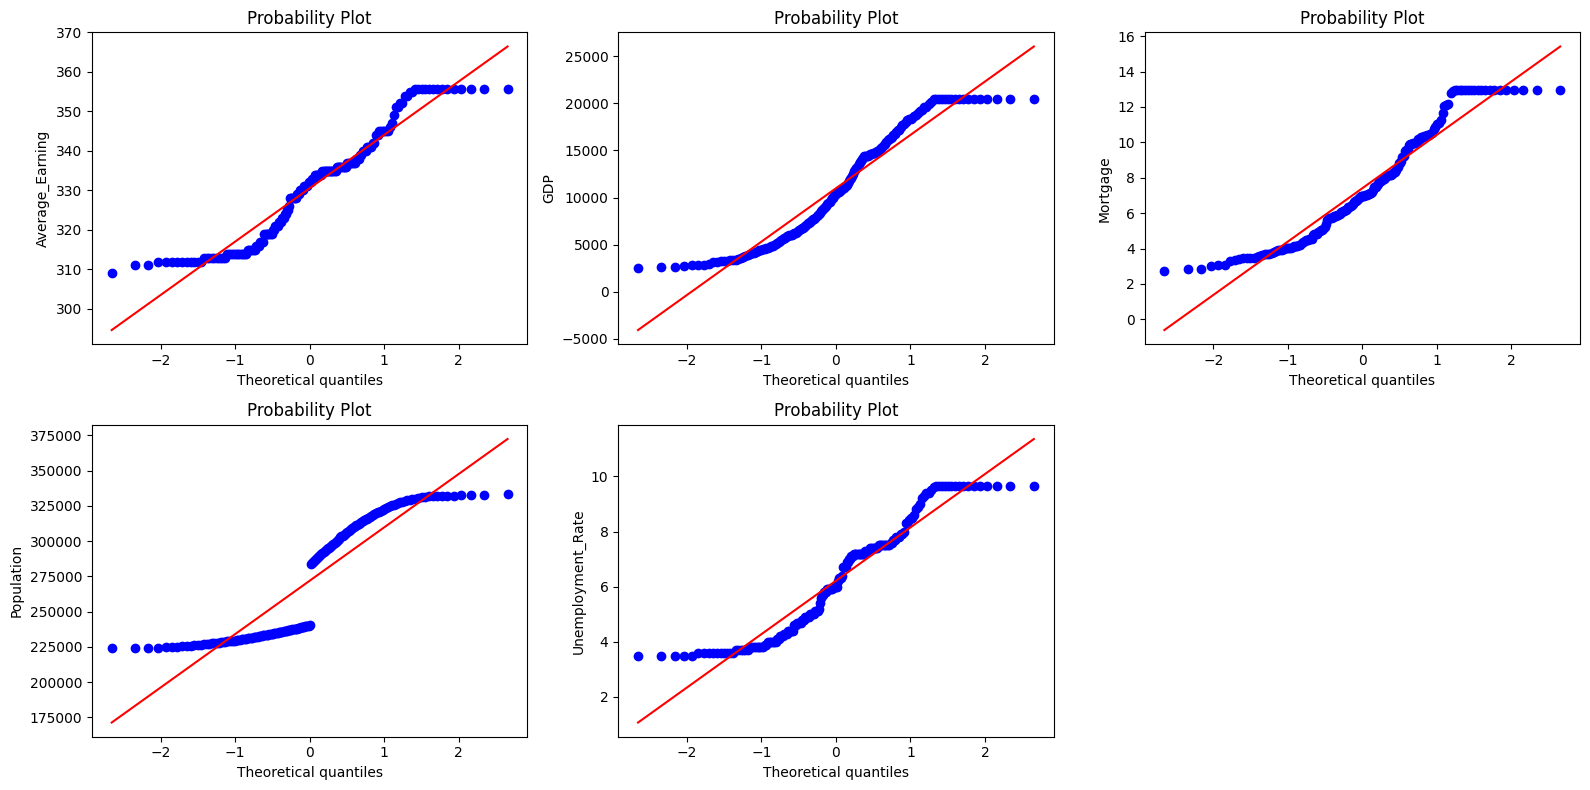

In [50]:
# Checking if data is normally distributed or not
from scipy import stats
plt.figure(figsize = (16,8))
for i,j in enumerate(data.iloc[:,:-1].columns):
    plt.subplot(2,3,i+1)

    stats.probplot(data[j], dist = "norm", plot = plt)
    plt.ylabel("{}".format(j))
    plt.tight_layout()

plt.subplots_adjust()
plt.show()

In [51]:
# using yeojohnson for transforming non-normal data to normal
for i,j in enumerate(data.iloc[:,:-1].columns):
    
    fitted_value, fitted_lambda = stats.yeojohnson(data[j])

In [52]:
def transformation(i):
    fitted_value, fitted_lambda = stats.yeojohnson(data[i])
    data[i] = fitted_value
    return data[i]

for i in data.iloc[:,:-1].columns:
    transformation(i)
data

,Average_Earning,GDP,Mortgage,Population,Unemployment_Rate,Average_Sales_Price
0,0.37,66.90,2.75,1.01,2.22,68300
1,0.37,67.66,2.77,1.01,2.22,72400
2,0.37,68.55,2.83,1.01,2.20,74200
3,0.37,69.20,2.89,1.01,2.20,72700
4,0.37,69.94,3.01,1.01,2.16,73600
...,...,...,...,...,...,...
170,0.37,169.15,1.45,1.01,1.68,473000
171,0.37,169.15,1.51,1.01,1.73,497300
172,0.37,169.15,1.61,1.01,1.68,514100
173,0.37,169.15,1.96,1.01,1.73,527500


In [53]:
# Performing feature scaling for making data scale free
from sklearn.preprocessing import StandardScaler
data.iloc[:,:-1] = StandardScaler().fit_transform(data.iloc[:,:-1])
data

,Average_Earning,GDP,Mortgage,Population,Unemployment_Rate,Average_Sales_Price
0,0.39,-1.79,1.00,-1.25,-0.04,68300
1,0.39,-1.77,1.02,-1.25,-0.04,72400
2,0.04,-1.74,1.16,-1.24,-0.09,74200
3,-0.26,-1.72,1.29,-1.23,-0.09,72700
4,-0.66,-1.70,1.55,-1.23,-0.20,73600
...,...,...,...,...,...,...
170,1.69,1.44,-1.85,1.35,-1.52,473000
171,1.69,1.44,-1.72,1.35,-1.37,497300
172,1.69,1.44,-1.50,1.35,-1.52,514100
173,1.69,1.44,-0.74,1.36,-1.37,527500


In [54]:
col = list(data.columns)

predictor = col[:-1] #selecting predictor columns
target = col[-1] # selecting target columns

display(predictor, target)

['Average_Earning', 'GDP', 'Mortgage', 'Population', 'Unemployment_Rate']

'Average_Sales_Price'

In [55]:
# Splitting datasets into train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2, random_state = 0)


In [56]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
models, predictions = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric = None, random_state = 0).fit(train[predictor], test[predictor], train[target], test[target])
models

100%|██████████| 42/42 [00:03<00:00, 12.48it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,1.00,1.00,5485.66,0.28
RandomForestRegressor,1.00,1.00,5941.98,0.21
BaggingRegressor,0.99,1.00,6875.76,0.05
XGBRegressor,0.99,0.99,7313.26,0.06
GradientBoostingRegressor,0.99,0.99,7561.05,0.11
DecisionTreeRegressor,0.99,0.99,8105.34,0.02
ExtraTreeRegressor,0.99,0.99,8168.48,0.02
AdaBoostRegressor,0.99,0.99,9821.72,0.14
KNeighborsRegressor,0.98,0.98,12565.93,0.02


### DecisionTree Regressor

In [57]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
# Selecting DecisionTreeRegressor for model Building

In [58]:
print("For Test: ")
model.fit(test[predictor], test[target])
test_pred = model.predict(test[predictor])
print("Variance Score", explained_variance_score(test[target], test_pred))
print("Mean Absolute Error : ", MAE(test[target], test_pred))
print("Mean Squared Error : ", MSE(test[target], test_pred))
print("Root Mean Squared Error : ", MSE(test[target], test_pred)**(1/2))

print("..............................................................")

print("For Train: ")
model.fit(train[predictor], train[target])
train_pred = model.predict(train[predictor])
print("Variance Score", explained_variance_score(train[target], train_pred))
print("Accuracy: ", accuracy_score(train[target], train_pred))
print("Mean Absolute Error : ", MAE(train[target], train_pred))
print("Mean Squared Error : ", MSE(train[target], train_pred))
print("Root Mean Squared Error : ", MSE(test[target], test_pred)**(1/2))

For Test: 
Variance Score 1.0
Mean Absolute Error :  0.0
Mean Squared Error :  0.0
Root Mean Squared Error :  0.0
..............................................................
For Train: 
Variance Score 1.0
Accuracy:  1.0
Mean Absolute Error :  0.0
Mean Squared Error :  0.0
Root Mean Squared Error :  0.0


Model is Overfitting

Lets try Hyperparameter Tuning for improvig Model

In [59]:
# Selecting parameters for hyperparameter tuning.
param = {"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"], 
        "splitter":["best", "random"], 
        "max_depth":list(range(1,50)), 
        "min_samples_split":list(range(2,50)), 
        "min_samples_leaf":list(range(1,50)),
        "max_features":["auto", "sqrt", "log2"], 
        "max_leaf_nodes":list(range(1,50))}

In [60]:
from sklearn.model_selection import RandomizedSearchCV
model_RS = RandomizedSearchCV(estimator = DecisionTreeRegressor(random_state = 0),param_distributions = param,n_jobs = -1,random_state = 0,cv = 5).fit(train[predictor], train[target])
model_RS

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20,
                                                              21, 22, 23, 24,
                                                              25, 26, 27, 28,
                                                              29, 30, 31, ...],
                                        'splitter': ['best', 'random']},
                   random_state=0)

In [61]:
model_RS.best_score_

0.9496912188911011

In [62]:
model_RS.best_params_

{'splitter': 'random',
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 22,
 'max_features': 'sqrt',
 'max_depth': 42,
 'criterion': 'poisson'}

In [63]:
model = model_RS.best_estimator_
model

DecisionTreeRegressor(criterion='poisson', max_depth=42, max_features='sqrt',
                      max_leaf_nodes=22, min_samples_leaf=2,
                      min_samples_split=9, random_state=0, splitter='random')

In [64]:
from sklearn.metrics import explained_variance_score
print("For Test: ")
model.fit(test[predictor], test[target])
test_pred = model.predict(test[predictor])
print("Variance Score", explained_variance_score(test[target], test_pred))
print("Mean Absolute Error : ", MAE(test[target], test_pred))
print("Mean Squared Error : ", MSE(test[target], test_pred))
print("Root Mean Squared Error : ", MSE(test[target], test_pred)**(1/2))


print("..............................................................")

print("For Train: ")
model.fit(train[predictor], train[target])
train_pred = model.predict(train[predictor])
print("Variance Score", explained_variance_score(train[target], train_pred))
print("Mean Absolute Error : ", MAE(train[target], train_pred))
print("Mean Squared Error : ", MSE(train[target], train_pred))
print("Root Mean Squared Error : ", MSE(test[target], test_pred)**(1/2))


For Test: 
Variance Score 0.8809590648247028
Mean Absolute Error :  23588.625850340137
Mean Squared Error :  1218998296.5986392
Root Mean Squared Error :  34914.156106064474
..............................................................
For Train: 
Variance Score 0.9644157633187543
Mean Absolute Error :  12732.444480589438
Mean Squared Error :  448443760.1273376
Root Mean Squared Error :  34914.156106064474


Still, Model is not giving desired output

Try Linear Regression

### Linear Regression

In [65]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [66]:
model_1 = smf.ols("Average_Sales_Price ~ Average_Earning + GDP + Mortgage + Population + Unemployment_Rate", data = train).fit()
display(model_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average_Sales_Price   R-squared:                       0.930
Model:                             OLS   Adj. R-squared:                  0.927
Method:                  Least Squares   F-statistic:                     356.3
Date:                 Sun, 25 Dec 2022   Prob (F-statistic):           1.53e-75
Time:                         12:30:14   Log-Likelihood:                -1640.5
No. Observations:                  140   AIC:                             3293.
Df Residuals:                      134   BIC:                             3311.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.289e+05   2569.244     89.098      0.000    2.24e+05    2.34e+05
Average_Earning    2.023e+04   4920.164      4.112      0.000    1.05e+04       3e+04
GDP                9.888e+04   1.18e+04      8.396      0.000    7.56e+04    1.22e+05
Mortgage           2.031e+04   8965.921      2.266      0.025    2581.736     3.8e+04
Population         1.417e+04   1.05e+04      1.347      0.180   -6631.447     3.5e+04
Unemployment_Rate  2368.8020   3983.318      0.595      0.553   -5509.508    1.02e+04
==============================================================================
Omnibus:                       74.212   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.550
Skew:                           1.891   Prob(JB):                     1.69e-77
Kurtosis:                       9.805   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared value = 93%
Adj R-Squared = 92.7%

In [67]:
test_pred_model_1 = model_1.predict(test[predictor])
train_pred_model_1 = model_1.predict(train[predictor])
print("RMSE Test : ",np.sqrt(mean_squared_error(test_pred_model_1, test[target])))
print("RMSE Train : ",np.sqrt(mean_squared_error(train_pred_model_1, train[target])))
print("R Squared : ", model_1.rsquared)
print("R2 Score", r2_score(test_pred_model_1, test[target]))

RMSE Test :  20849.043468935255
RMSE Train :  29691.74778868729
R Squared :  0.9300446080033374
R2 Score 0.9654732691946473


### Using Regularization Technique

## Lasso


In [68]:
from sklearn.linear_model import Lasso
model_2 = Lasso(alpha = 0.15, normalize = True).fit(train[predictor], train[target])
model_2

Lasso(alpha=0.15, normalize=True)

In [69]:
test_pred_model_2 = model_2.predict(test[predictor])
train_pred_model_2 = model_2.predict(train[predictor])
print("RMSE Test : ",np.sqrt(mean_squared_error(test_pred_model_2, test[target])))
print("RMSE Train : ",np.sqrt(mean_squared_error(train_pred_model_2, train[target])))
print("Score : ", model_2.score(test[predictor], test[target]))
print("R2 Score : ",r2_score(test_pred_model_2, test[target]))

RMSE Test :  20845.954712146977
RMSE Train :  29691.750682256403
Score :  0.9575637683851523
R2 Score :  0.9654804351676453


## Ridge

In [70]:
from sklearn.linear_model import Ridge
model_3 = Ridge(alpha=0.15, normalize = True).fit(train[predictor], train[target])
model_3

Ridge(alpha=0.15, normalize=True)

In [71]:
test_pred_model_3 = model_3.predict(test[predictor])
train_pred_model_3 = model_3.predict(train[predictor])
print("RMSE Test : ",np.sqrt(mean_squared_error(test_pred_model_3, test[target])))
print("RMSE Train : ",np.sqrt(mean_squared_error(train_pred_model_3, train[target])))
print("Score : ", model_3.score(test[predictor], test[target]))
print("R2 Score", r2_score(test_pred_model_3, test[target]))

RMSE Test :  21183.04555176948
RMSE Train :  32909.40923163402
Score :  0.9561802362792963
R2 Score 0.9591550846903814


### CONCLUSION

In [72]:
print("RMSE Test of OLS Model : ",np.sqrt(mean_squared_error(test_pred_model_1, test[target])))
print("RMSE Train of OLS Model : ",np.sqrt(mean_squared_error(train_pred_model_1, train[target])))
print("R Squared of OLS Model : ", model_1.rsquared)
print("R2 Score of OLS Model : ", r2_score(test_pred_model_1, test[target]))

print("------------------------------------------------")

print("RMSE Test of Lasso : ",np.sqrt(mean_squared_error(test_pred_model_2, test[target])))
print("RMSE Train of Lasso : ",np.sqrt(mean_squared_error(train_pred_model_2, train[target])))
print("Score of Lasso : ", model_2.score(test[predictor], test[target]))
print("R2 Score of Lasso : ",r2_score(test_pred_model_2, test[target]))

print("------------------------------------------------")

print("RMSE Test of Ridge : ",np.sqrt(mean_squared_error(test_pred_model_3, test[target])))
print("RMSE Train of Ridge : ",np.sqrt(mean_squared_error(train_pred_model_3, train[target])))
print("Score of Ridge : ", model_3.score(test[predictor], test[target]))
print("R2 Score of Ridge : ", r2_score(test_pred_model_3, test[target]))

RMSE Test of OLS Model :  20849.043468935255
RMSE Train of OLS Model :  29691.74778868729
R Squared of OLS Model :  0.9300446080033374
R2 Score of OLS Model :  0.9654732691946473
------------------------------------------------
RMSE Test of Lasso :  20845.954712146977
RMSE Train of Lasso :  29691.750682256403
Score of Lasso :  0.9575637683851523
R2 Score of Lasso :  0.9654804351676453
------------------------------------------------
RMSE Test of Ridge :  21183.04555176948
RMSE Train of Ridge :  32909.40923163402
Score of Ridge :  0.9561802362792963
R2 Score of Ridge :  0.9591550846903814


In [73]:
data

,Average_Earning,GDP,Mortgage,Population,Unemployment_Rate,Average_Sales_Price
0,0.39,-1.79,1.00,-1.25,-0.04,68300
1,0.39,-1.77,1.02,-1.25,-0.04,72400
2,0.04,-1.74,1.16,-1.24,-0.09,74200
3,-0.26,-1.72,1.29,-1.23,-0.09,72700
4,-0.66,-1.70,1.55,-1.23,-0.20,73600
...,...,...,...,...,...,...
170,1.69,1.44,-1.85,1.35,-1.52,473000
171,1.69,1.44,-1.72,1.35,-1.37,497300
172,1.69,1.44,-1.50,1.35,-1.52,514100
173,1.69,1.44,-0.74,1.36,-1.37,527500


In [75]:
X= data.values[:,(0,1,2,3,4)]

In [77]:
data['sales_pred']= model_2.predict(X)
data

,Average_Earning,GDP,Mortgage,Population,Unemployment_Rate,Average_Sales_Price,sales_pred
0,0.39,-1.79,1.00,-1.25,-0.04,68300,62011.19
1,0.39,-1.77,1.02,-1.25,-0.04,72400,65012.10
2,0.04,-1.74,1.16,-1.24,-0.09,74200,63369.81
3,-0.26,-1.72,1.29,-1.23,-0.09,72700,61903.41
4,-0.66,-1.70,1.55,-1.23,-0.20,73600,61436.35
...,...,...,...,...,...,...,...
170,1.69,1.44,-1.85,1.35,-1.52,473000,383030.32
171,1.69,1.44,-1.72,1.35,-1.37,497300,385998.38
172,1.69,1.44,-1.50,1.35,-1.52,514100,390220.58
173,1.69,1.44,-0.74,1.36,-1.37,527500,406061.39


In [80]:
(data["Average_Sales_Price"] - data["sales_pred"]).head(15)

0     6288.81
1     7387.90
2    10830.19
3    10796.59
4    12163.65
5    22430.15
6    19624.01
7    20951.35
8    19002.73
9    26359.99
10   26432.12
11   19873.24
12   17120.71
13   16070.34
14   18534.45
dtype: float64